# Определение потенциально популярных продуктов для интернет-магазина «N» 

`Цель:` спланировать рекламные кампании для интернет-магазина.
`Задача:` проанализировать данные о прошлых продажах в магазине и определить факторы предсказывающие популярность продукта, выявить определяющие успешность игры закономерности

Ход исследования:

1. Обзор данных.
2. Предобработка данных.
3. Анализ данных
4. Формулировка закономерностей

`Входные данные:` games.csv

`Описание полей данных:`

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
games_info = pd.read_csv('/datasets/games.csv')
games_info.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games_info.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


##### Вывод:
Просмотрена основная информация и статистика данных.

- Данные предоставлены за период 1980-2016 гг.,из трех регионов, в достаточном объеме ~16713 записей.
- В данных присутствуют пропуски. 
- Тип некоторых полей данных не соответствует содержанию.

## Предобработка данных

План предобработки данных:

1. Исправить стилистические нарушения - привести названия столбцов к нижнему регистру
2. Преобразуйте данные в нужные типы.
3. Обработать пропуски
4. Проверить наличие дубликатов

И дополнительно по заданию требуется посчитать суммарные продажи во всех регионах.

### Исправление стилистических нарушений

Приведем названия столбцов к нижнему регистру.

In [5]:
games_info.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
games_info.columns = games_info.columns.str.lower()
games_info.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Заполнение пропусков

Перед преобразованием типов обработаем пропуски. 

Посмотрим, где в таблице есть пропуски:

In [7]:
games_info_name_list = list(games_info.columns)
    
for name in games_info_name_list:
    print(name ,games_info[name].isna().sum())


name 2
platform 0
year_of_release 269
genre 2
na_sales 0
eu_sales 0
jp_sales 0
other_sales 0
critic_score 8578
user_score 6701
rating 6766


In [9]:
games_info[games_info['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
games_info[games_info['year_of_release'].isna() == True].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


    name 2 - возможно стоит удалить эти строки полность. Продажи этих игр небольшие и информация пропущена в 5 параметра. Или заменить на 'неизвестно'

    year_of_release 269 - удалим
    genre 2 - незначительно

    critic_score 8578 - поставим заглушку -1
    user_score 6701 - поставим заглушку -1


    rating 6766 заполним просто неизвестным значением.

In [11]:
games_info['rating'] = games_info['rating'].fillna('unknown')
games_info['name'].dropna()

0                           Wii Sports
1                    Super Mario Bros.
2                       Mario Kart Wii
3                    Wii Sports Resort
4             Pokemon Red/Pokemon Blue
                     ...              
16710    Samurai Warriors: Sanada Maru
16711                 LMA Manager 2007
16712          Haitaka no Psychedelica
16713                 Spirits & Spells
16714              Winning Post 8 2016
Name: name, Length: 16713, dtype: object

In [12]:
games_info = games_info.dropna(subset = ['year_of_release'])
games_info['critic_score'] = games_info['critic_score'].fillna(-1)
games_info['user_score'] = games_info['user_score'].fillna(-1)

In [13]:
# контрольная проверка

games_info_name_list = list(games_info.columns)

for name in games_info_name_list:
    print(name ,games_info[name].isna().sum())

name 2
platform 0
year_of_release 0
genre 2
na_sales 0
eu_sales 0
jp_sales 0
other_sales 0
critic_score 0
user_score 0
rating 0


Теперь нужно разобраться с tbd.

In [14]:
games_info[games_info['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,-1.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


In [15]:
games_info['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

- TBD means "To Be Decided" or "To Be Determined." It is a placeholder term, like TBC (to be confirmed) and TBA (to be announced).

То есть по сути, можно заменить на заглушку, которую можно преобразовать во флот. возьмем -1

In [16]:
games_info.loc[games_info['user_score'] == 'tbd','user_score'] = -1

In [18]:
games_info.loc[games_info['user_score'] == -1]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1,unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1,unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,-1,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,unknown


### Преобразования типов

Из обзора данных:

     0   Name             16713 non-null  object 
     1   Platform         16715 non-null  object 
     2   Year_of_Release  16446 non-null  float64  стоит преобразовать в int
     3   Genre            16713 non-null  object 
     4   NA_sales         16715 non-null  float64
     5   EU_sales         16715 non-null  float64
     6   JP_sales         16715 non-null  float64
     7   Other_sales      16715 non-null  float64
     8   Critic_Score     8137 non-null   float64
     9   User_Score       10014 non-null  object   стоит преобразовать во float64
     10  Rating           9949 non-null   object 



In [19]:
games_info['year_of_release'] = games_info['year_of_release'].astype(int)
games_info['user_score'] = games_info['user_score'].astype(float)
games_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Обработка дубликатов

1. Обработаем явные дубликаты
2. Просмотрим уникальные значения name, для выявления неявных дубликатов

In [20]:
games_info.duplicated().sum()

0

In [21]:
games_info = games_info.drop_duplicates()

In [23]:
games_info['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [24]:
games_info.duplicated().sum()

0

### Дополнительные расчеты 

Требуется посчитать суммарные продажи во всех регионах.

In [25]:
games_info['sales_all'] = games_info['na_sales'] + games_info['eu_sales'] + games_info['jp_sales'] + games_info['other_sales']

In [26]:
games_info

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,unknown,0.01


In [27]:
# Посмотрим, что у нас осталось
temp = games_info.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
 11  sales_all        16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
name : ко

## Анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

In [28]:
games_info.groupby('year_of_release').agg('count')

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
year_of_release,,,,,,,,,,,
1980,9,9,9,9,9,9,9,9,9,9,9
1981,46,46,46,46,46,46,46,46,46,46,46
1982,36,36,36,36,36,36,36,36,36,36,36
1983,17,17,17,17,17,17,17,17,17,17,17
1984,14,14,14,14,14,14,14,14,14,14,14
1985,14,14,14,14,14,14,14,14,14,14,14
1986,21,21,21,21,21,21,21,21,21,21,21
1987,16,16,16,16,16,16,16,16,16,16,16
1988,15,15,15,15,15,15,15,15,15,15,15


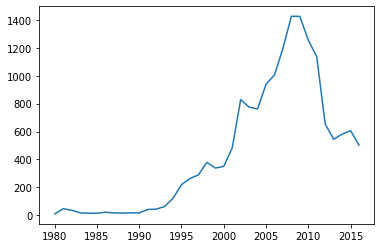

In [29]:
years_list = games_info.groupby('year_of_release').agg('count').index
tmp = []

for year in years_list:
    tmp.append(games_info.loc[games_info['year_of_release'] == year,'sales_all'].count())
    
plt.plot(years_list,tmp)
plt.show()
    

Вопрос: Важны ли данные за все периоды?

Для задачи прогнозирования популярности не нужен такой большой промежуток. Стоит смотреть данные за последние 3-5 лет не больше..

##### Зависимость продаж от платформы
Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам. 

In [30]:
games_info.groupby('platform').agg('sum').sort_values(by = 'sales_all', ascending = False).head(10)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
platform,,,,,,,,
PS2,4263750,572.92,332.63,137.54,190.47,86759.0,8395.9,1233.56
X360,2476173,595.74,268.32,12.30,84.88,61067.0,6026.3,961.24
PS3,2626158,390.13,327.21,79.41,134.59,56155.0,5340.5,931.34
Wii,2583531,486.87,258.32,68.28,77.71,34940.0,2954.4,891.18
DS,4259361,380.31,188.41,175.02,59.04,43707.0,1986.6,802.78
PS,2377627,334.72,212.39,139.78,40.69,13037.0,218.5,727.58
PS4,789937,108.74,141.09,15.96,48.35,18027.0,1599.3,314.14
GBA,1624604,184.12,74.59,46.56,7.61,28563.0,1365.0,312.88
PSP,2396417,107.27,65.62,75.88,40.76,30059.0,2250.0,289.53


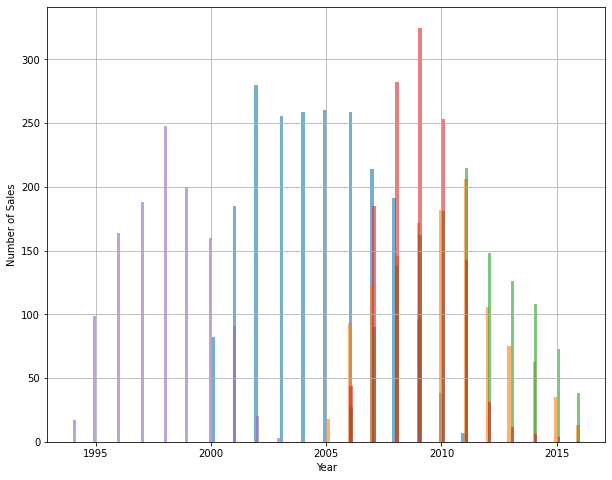

In [31]:
plarform_list = ['PS2','X360','PS3','Wii','PS']


for platform in plarform_list:
    games_info[games_info['platform'] == platform]['year_of_release'].hist(bins = 70, alpha=0.6, figsize = (10,8))
    plt.ylabel('Number of Sales')
    plt.xlabel('Year')
    
    
#games_info[games_info['platform'] == 'PS2']['year_of_release'].hist(bins = 50, alpha=0.5)

Вопрос: За какой характерный срок появляются новые и исчезают старые платформы?


На гистограмме видно, что жизненный цикл платфрмы 5-7 лет.

Возьмем данные за последние 5 лет

In [32]:
games_good_info = games_info[games_info['year_of_release'] >= 2012]

In [33]:
games_good_info.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [34]:
games_good_info.groupby('platform').agg('sum').sort_values(by = 'sales_all', ascending = False).head(10)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
platform,,,,,,,,
PS4,789937,108.74,141.09,15.96,48.35,18027.0,1599.3,314.14
PS3,992629,103.38,106.86,35.29,43.26,15036.0,1638.8,288.79
X360,587862,140.05,74.52,1.57,20.40,11998.0,1404.9,236.54
3DS,797445,55.31,42.64,87.79,8.87,6969.0,519.8,194.61
XOne,497693,93.12,51.59,0.34,14.27,12314.0,1121.9,159.32
WiiU,296008,38.10,25.13,13.01,5.95,6309.0,643.4,82.19
PC,503498,19.12,37.76,0.00,5.77,14964.0,1280.3,62.65
PSV,827865,10.98,11.36,21.04,5.80,7328.0,682.3,49.18
Wii,108688,17.45,11.92,3.39,2.61,332.0,66.4,35.37


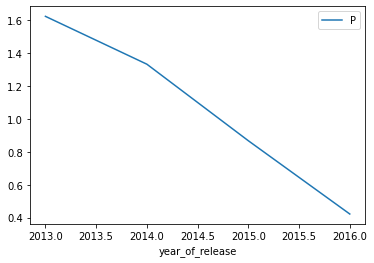

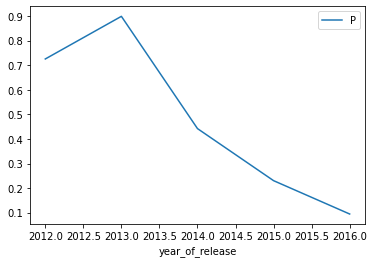

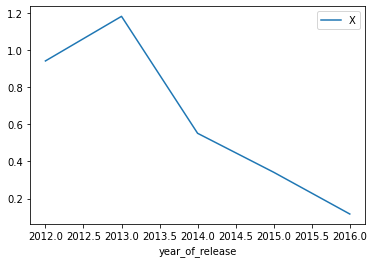

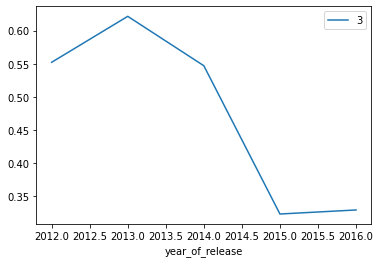

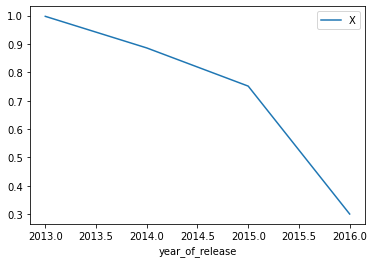

In [35]:
plarform_list = ['PS4','PS3','X360','3DS','XOne']


for platform in plarform_list:
    pivot = games_good_info[games_good_info['platform'] == platform].pivot_table(index = 'year_of_release', values = 'sales_all').plot()
    plt.legend(platform)

Продажи падают у всех платформ, меньше у PS4 и XOne

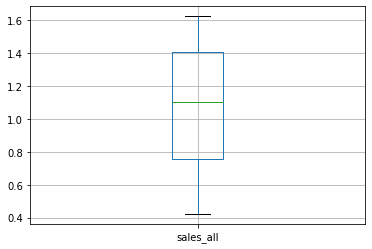

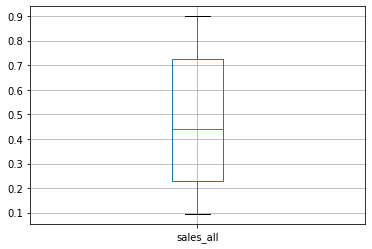

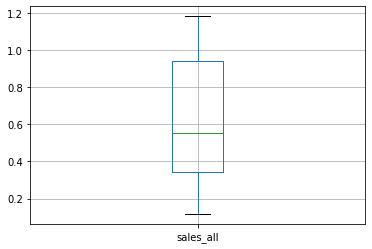

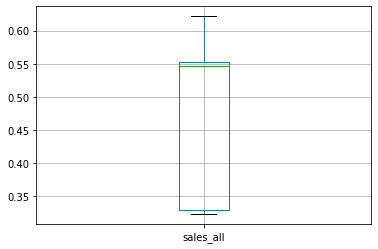

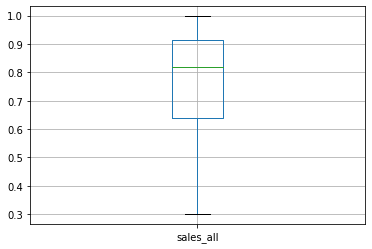

In [36]:
plarform_list = ['PS4','PS3','X360','3DS','XOne']


for platform in plarform_list:
    pivot = games_good_info[games_good_info['platform'] == platform].pivot_table(index = 'year_of_release', values = 'sales_all').boxplot(column ='sales_all')
    
    plt.show()
    

Диаграммы размаха показывают, что медиана продаж PS4 существенно выше. 

Верхняя граница продаж для 3DS и XOne ~2 раза ниже остальных платформ.

##### Влияние отзывов на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

[-0.031957110204556376,
 -0.005143522887113828,
 0.006163978646213326,
 0.19758263411038599,
 -0.06892505328279414]

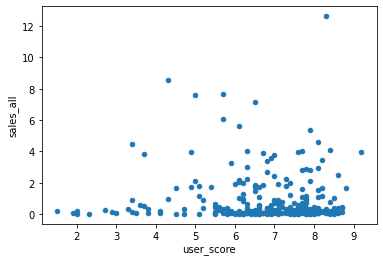

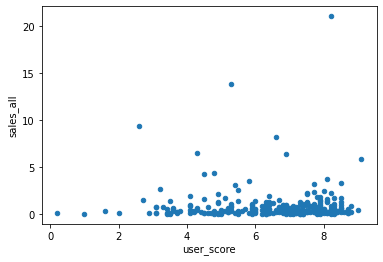

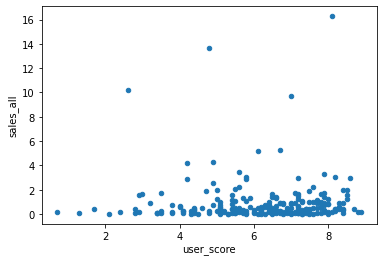

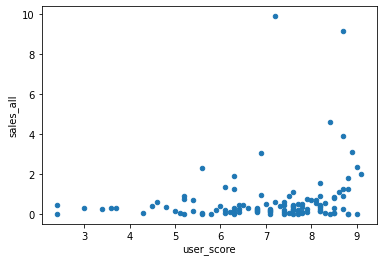

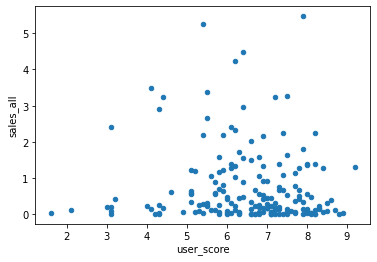

In [37]:
plarform_list = ['PS4','PS3','X360','3DS','XOne']
corr_list_user = []
tmp = games_good_info[games_good_info['user_score'] >= 0]

for platform in plarform_list:
    tmp[tmp['platform'] == platform].plot(x='user_score',y ='sales_all', kind='scatter', alpha=1) 
    corr_list_user.append(tmp[tmp['platform'] == platform]['user_score'].corr(tmp[tmp['platform'] == platform]['sales_all']))
corr_list_user

[0.40656790206178095,
 0.3314972592629587,
 0.3605734888507336,
 0.3208028695360785,
 0.4169983280084017]

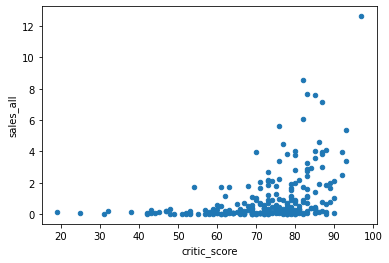

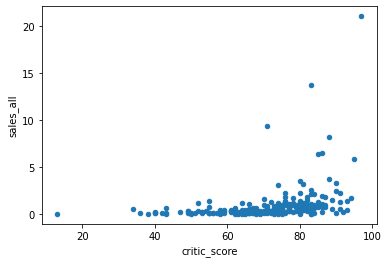

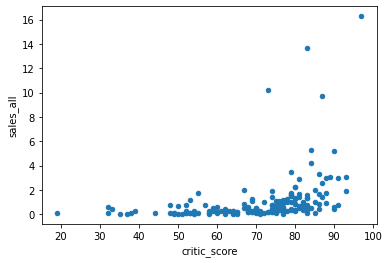

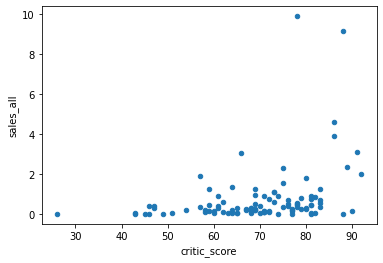

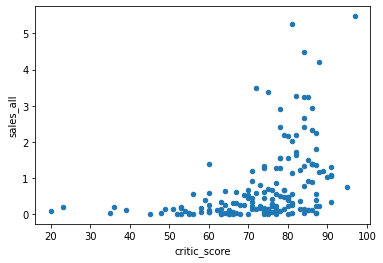

In [38]:
plarform_list = ['PS4','PS3','X360','3DS','XOne']
corr_list_critic = []
tmp = games_good_info[games_good_info['critic_score'] >= 0]

for platform in plarform_list:
    tmp[tmp['platform'] == platform].plot(x='critic_score',y ='sales_all', kind='scatter', alpha=1) 
    corr_list_critic.append(tmp[tmp['platform'] == platform]['critic_score'].corr(tmp[tmp['platform'] == platform]['sales_all']))
corr_list_critic


Корреляция между оценками критиков и кол-вом продаж заметно выше, но все-таки небольшая.

#####  Зависимость продаж от жанра
Посмотрим на общее распределение игр по жанрам. 

<AxesSubplot:xlabel='genre'>

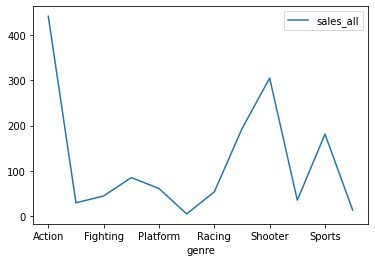

In [39]:
pivot = games_good_info.pivot_table(index = 'genre', values = 'sales_all', aggfunc = 'sum')
pivot.plot()

<AxesSubplot:>

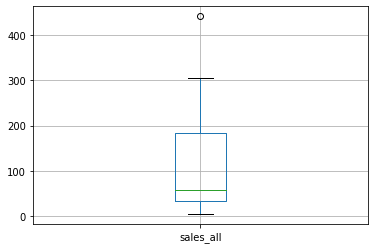

In [40]:
pivot.boxplot()

In [41]:
np.sqrt(pivot['sales_all'].var())

135.22051938547858

In [42]:
games_good_info.groupby('genre').agg('sum').sort_values(by = 'sales_all', ascending = False)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
genre,,,,,,,,
Action,2076366,177.84,159.34,52.80,51.14,30526.0,3061.5,441.12
Shooter,473263,144.77,113.47,9.23,37.26,12640.0,1215.0,304.73
Role-Playing,745139,64.00,48.53,65.44,14.83,11552.0,1042.2,192.80
Sports,539746,81.53,69.09,8.01,22.44,10299.0,990.9,181.07
Misc,386675,38.19,26.32,12.86,7.67,4015.0,339.9,85.04
Platform,171175,25.38,21.41,8.63,5.58,4376.0,430.2,61.00
Racing,231600,17.22,27.29,2.50,6.49,5787.0,500.0,53.50
Fighting,219501,19.79,10.79,9.44,4.47,4461.0,443.7,44.49
Simulation,161117,7.97,14.55,10.41,2.19,2557.0,235.5,35.12


Самые прибыльные жанры Action и Shooter. Жанры с высокой прибылью сильно выделяются.

In [43]:
plarform_list = list(games_good_info['platform'].unique())


for platform in plarform_list:
    print(' ')
    print(platform)
    #display(games_good_info[games_good_info['platform'] == platform].groupby('genre').agg('median').sort_values(by = 'sales_all', ascending = False).head())
    #tmp.append(games_good_info[games_good_info['platform'] == platform].groupby('genre').agg('median').sort_values(by = 'sales_all', ascending = False).head().index)
    tmp = games_good_info[games_good_info['platform'] == platform].groupby('genre').agg('median').sort_values(by = 'sales_all', ascending = False).head()
    print(tmp.head().index)
    #display(tmp.pivot_table(index = 'genre',values = 'sales_all'))
    
    #plt.pie(tmp['sales_all'],)
    #lt.show()

 
PS3
Index(['Shooter', 'Sports', 'Action', 'Platform', 'Fighting'], dtype='object', name='genre')
 
X360
Index(['Role-Playing', 'Shooter', 'Sports', 'Strategy', 'Action'], dtype='object', name='genre')
 
PS4
Index(['Shooter', 'Sports', 'Platform', 'Racing', 'Simulation'], dtype='object', name='genre')
 
3DS
Index(['Racing', 'Role-Playing', 'Platform', 'Sports', 'Simulation'], dtype='object', name='genre')
 
DS
Index(['Role-Playing', 'Platform', 'Misc', 'Simulation', 'Sports'], dtype='object', name='genre')
 
XOne
Index(['Shooter', 'Sports', 'Role-Playing', 'Fighting', 'Racing'], dtype='object', name='genre')
 
WiiU
Index(['Platform', 'Racing', 'Role-Playing', 'Sports', 'Misc'], dtype='object', name='genre')
 
Wii
Index(['Platform', 'Puzzle', 'Role-Playing', 'Sports', 'Strategy'], dtype='object', name='genre')
 
PC
Index(['Shooter', 'Role-Playing', 'Simulation', 'Action', 'Strategy'], dtype='object', name='genre')
 
PSV
Index(['Shooter', 'Fighting', 'Sports', 'Platform', 'Role-Playing'

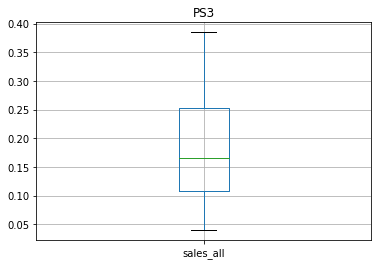

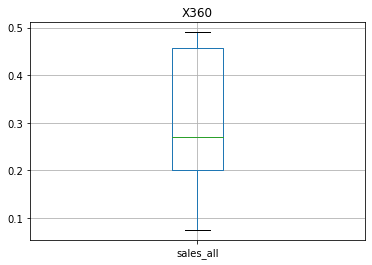

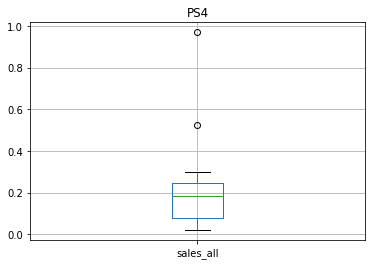

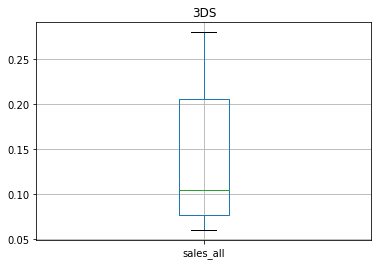

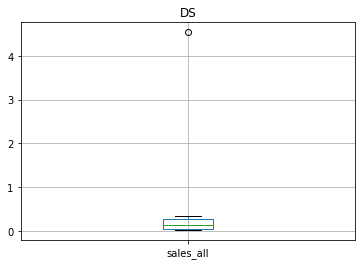

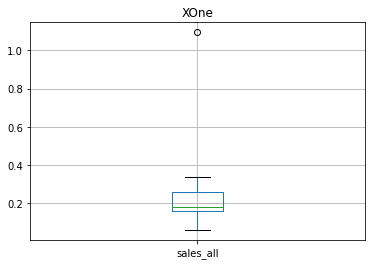

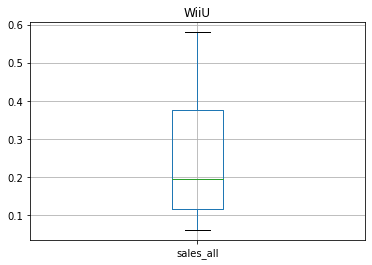

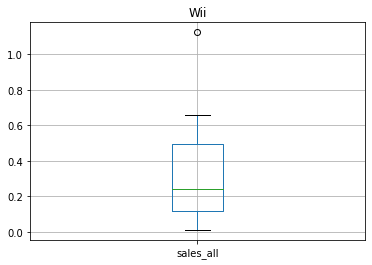

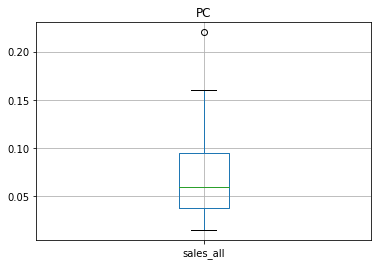

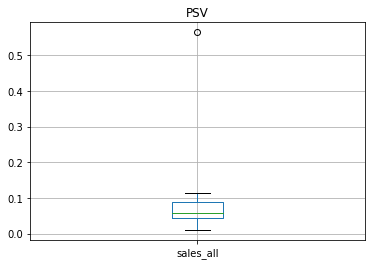

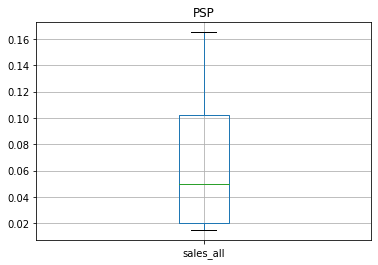

In [44]:
plarform_list = list(games_good_info['platform'].unique())
#plarform_list = ['PS4','PS3','X360','3DS','XOne']
for platform in plarform_list:
    tmp = games_good_info[games_good_info['platform'] == platform].groupby('genre').agg('median').sort_values(by = 'sales_all', ascending = False)
    pivot = tmp.pivot_table(index = 'genre', values = 'sales_all').boxplot(column ='sales_all')
    plt.title(platform)
    plt.show()
    

#### Анализ различий по регионам

Определим для пользователя каждого региона (NA, EU, JP):

    Самые популярные платформы (топ-5).
    Самые популярные жанры (топ-5). 
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [45]:
games_good_info

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01


##### Самые популярные платформы по регионам

In [46]:
# Топ платформ для Северной Америки
top_platform_na = games_good_info.groupby('platform').agg('sum').sort_values(by = 'na_sales', ascending = False).head()
top_platform_na

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
platform,,,,,,,,
X360,587862,140.05,74.52,1.57,20.40,11998.0,1404.9,236.54
PS4,789937,108.74,141.09,15.96,48.35,18027.0,1599.3,314.14
PS3,992629,103.38,106.86,35.29,43.26,15036.0,1638.8,288.79
XOne,497693,93.12,51.59,0.34,14.27,12314.0,1121.9,159.32
3DS,797445,55.31,42.64,87.79,8.87,6969.0,519.8,194.61


In [47]:
# Топ платформ для Европы
top_platform_eu = games_good_info.groupby('platform').agg('sum').sort_values(by = 'eu_sales', ascending = False).head()

In [48]:
# Топ платформ для Японии
top_platform_jp = games_good_info.groupby('platform').agg('sum').sort_values(by = 'jp_sales', ascending = False).head()

na_sales


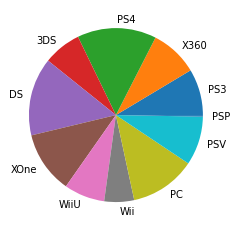

eu_sales


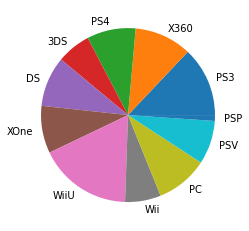

jp_sales


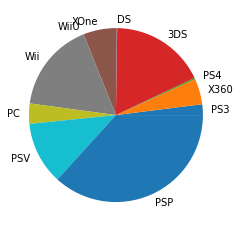

In [49]:
# Доли продаж
games_grouped = games_good_info.groupby('platform').agg('sum').sort_values(by = 'sales_all', ascending = False)

region_list = ['na_sales','eu_sales', 'jp_sales']
#share_list= []

plarform_list = list(games_good_info['platform'].unique())


for region in region_list:
    tmp = games_grouped[region]/games_grouped['sales_all']
    print(region)
    plt.pie(tmp, labels=plarform_list)
    plt.show()
    
    #share_list  games_grouped[region]/games_grouped['sales_all']
    

Показатели продаж в Японии сильно отличаются от показателей Европы и Северной Америки.

##### Самые популярные жанры по регионам

In [50]:
games_good_info.groupby('genre').agg('sum').sort_values(by = 'na_sales', ascending = False).head()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
genre,,,,,,,,
Action,2076366,177.84,159.34,52.80,51.14,30526.0,3061.5,441.12
Shooter,473263,144.77,113.47,9.23,37.26,12640.0,1215.0,304.73
Sports,539746,81.53,69.09,8.01,22.44,10299.0,990.9,181.07
Role-Playing,745139,64.00,48.53,65.44,14.83,11552.0,1042.2,192.80
Misc,386675,38.19,26.32,12.86,7.67,4015.0,339.9,85.04


In [51]:
games_good_info.groupby('genre').agg('sum').sort_values(by = 'eu_sales', ascending = False).head()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
genre,,,,,,,,
Action,2076366,177.84,159.34,52.80,51.14,30526.0,3061.5,441.12
Shooter,473263,144.77,113.47,9.23,37.26,12640.0,1215.0,304.73
Sports,539746,81.53,69.09,8.01,22.44,10299.0,990.9,181.07
Role-Playing,745139,64.00,48.53,65.44,14.83,11552.0,1042.2,192.80
Racing,231600,17.22,27.29,2.50,6.49,5787.0,500.0,53.50


In [52]:
games_good_info.groupby('genre').agg('sum').sort_values(by = 'jp_sales', ascending = False).head()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
genre,,,,,,,,
Role-Playing,745139,64.00,48.53,65.44,14.83,11552.0,1042.2,192.80
Action,2076366,177.84,159.34,52.80,51.14,30526.0,3061.5,441.12
Misc,386675,38.19,26.32,12.86,7.67,4015.0,339.9,85.04
Simulation,161117,7.97,14.55,10.41,2.19,2557.0,235.5,35.12
Fighting,219501,19.79,10.79,9.44,4.47,4461.0,443.7,44.49


In [53]:
games_grouped = games_good_info.groupby('genre').agg('sum').sort_values(by = 'sales_all', ascending = False)
games_grouped.shape

(12, 8)

na_sales


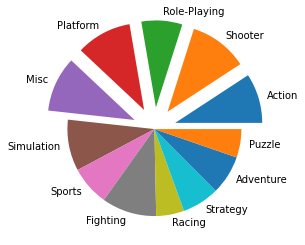

eu_sales


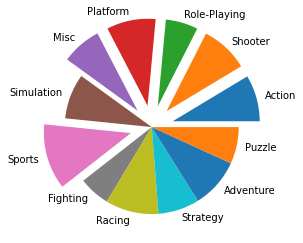

jp_sales


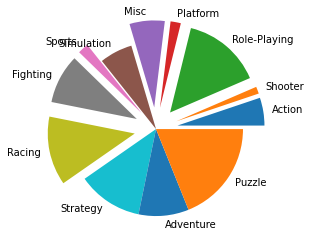

In [54]:
# Доли продаж
games_grouped = games_good_info.groupby('genre').agg('sum').sort_values(by = 'sales_all', ascending = False)
top = []
explode = np.zeros(12)


region_list = ['na_sales','eu_sales', 'jp_sales']
genre_list = list(games_good_info['genre'].unique())
games_grouped_list = list(games_grouped.index)


for region in region_list:
    print(region)
    tmp = games_grouped[region]/games_grouped['sales_all']
    top = games_good_info.groupby('genre').agg('sum').sort_values(by = region, ascending = False).head().index
    list(top)
    idx = []
    
    for i in range(0,len(top)): #
        if top[i] in games_grouped_list: idx.append(games_grouped_list.index(top[i]))
    for i in idx: explode[i] = .25
        
    #print(explode)
    
    plt.pie(tmp, labels=genre_list, explode = explode)
    plt.show()
    
    


##### Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [55]:
games_good_info.groupby('rating').agg('sum').sort_values(by = 'na_sales', ascending = False).head()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
rating,,,,,,,,
M,1002837,231.57,193.96,21.20,63.38,32450.0,3300.1,510.11
E,795480,114.37,113.03,28.33,31.44,19378.0,1955.1,287.17
unknown,2567761,103.31,91.50,108.84,27.17,1855.0,-864.1,330.82
E10+,616260,75.70,55.37,8.19,16.23,15464.0,1719.7,155.49
T,829826,66.02,52.96,26.02,17.94,24082.0,2694.1,162.94


In [56]:
games_good_info.groupby('rating').agg('sum').sort_values(by = 'eu_sales', ascending = False).head()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
rating,,,,,,,,
M,1002837,231.57,193.96,21.20,63.38,32450.0,3300.1,510.11
E,795480,114.37,113.03,28.33,31.44,19378.0,1955.1,287.17
unknown,2567761,103.31,91.50,108.84,27.17,1855.0,-864.1,330.82
E10+,616260,75.70,55.37,8.19,16.23,15464.0,1719.7,155.49
T,829826,66.02,52.96,26.02,17.94,24082.0,2694.1,162.94


In [57]:
games_good_info.groupby('rating').agg('sum').sort_values(by = 'jp_sales', ascending = False).head()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
rating,,,,,,,,
unknown,2567761,103.31,91.50,108.84,27.17,1855.0,-864.1,330.82
E,795480,114.37,113.03,28.33,31.44,19378.0,1955.1,287.17
T,829826,66.02,52.96,26.02,17.94,24082.0,2694.1,162.94
M,1002837,231.57,193.96,21.20,63.38,32450.0,3300.1,510.11
E10+,616260,75.70,55.37,8.19,16.23,15464.0,1719.7,155.49


В каждом регионе, чем строже ограничение, тем ниже продажи. 

## Проверка гипотез

#### Гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

    H0 -пользовательские рейтинги платформ Xbox One и PC одинаковые
    H1 - пользовательские рейтинги платформ Xbox One и PC различаются

In [58]:
games_good_info.groupby('platform').agg('mean').sort_values(by = 'user_score', ascending = False).head()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
platform,,,,,,,,
PC,2013.992000,0.076480,0.151040,0.000000,0.023080,59.856000,5.121200,0.250600
X360,2013.226027,0.479623,0.255205,0.005377,0.069863,41.089041,4.811301,0.810068
XOne,2014.951417,0.377004,0.208866,0.001377,0.057773,49.854251,4.542105,0.645020
WiiU,2013.659864,0.259184,0.170952,0.088503,0.040476,42.918367,4.376871,0.559116
PS4,2015.145408,0.277398,0.359923,0.040714,0.123342,45.987245,4.079847,0.801378


In [59]:
tmp = games_good_info[games_good_info['user_score'] >= 0]

In [60]:
xbox_data = tmp[tmp['platform'] == 'XOne']
pc_data = tmp[tmp['platform'] == 'PC']

In [61]:
alpha = .01

results = st.ttest_ind(
    xbox_data['user_score'], 
    pc_data['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


In [62]:
# 
xbox_data.user_score.min(), pc_data.user_score.min()

(1.6, 1.4)

###### Гипотеза 1 подтвердилась.

Был выбран метод предназначеный для сравнения средний двух независимых совокупностей.

#### Гипотеза 2: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

    Н0 - средние пользовательские рейтинги жанров Action и Sports одинаковые.
    Н1 - средние пользовательские рейтинги жанров Action и Sports различаются.

In [63]:
tmp = games_good_info[games_good_info['user_score'] >= 0]

In [64]:
action_data = tmp[tmp['genre'] == 'Action']
sports_data = tmp[tmp['genre'] == 'Sports']

In [65]:
alpha = .01

results = st.ttest_ind(
    action_data['user_score'], 
    sports_data['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


In [66]:
action_data.user_score.min(), sports_data.user_score.min()

(1.6, 0.2)

###### Гипотеза 2 также подтвердилась

## Выводы

В процессе анализа получилось выявить следующие закономерности определяющие успешность игры: 

    - обьемы продаж ззависят от платформы, которая предоставляет игру
    - 'жизненный цикл' платформы 5-7 лет, стоит выбирать платформу, которая существует около 3 лет
    - отзывы критиков имеют большее влияние, чем отзывы пользователей
    - популярность платформ и жанров для Японии и Северной Америки/Европы стоит рассматривать отдельно
    - популярные жанры для Северной Америки/Европы: Action, Shooter, Role-Playing, Platform, Misc, Sports
    - популярные жанры для Японии:Role-Playing,Racing, Misc Action
    
    - популярные платформы для Северной Америки: PS4,PS3,PSV,DS, XOne 
    - популярные платформы для Европы: 'PS4','PS3','X360','XOne',WiiU
    - популярные платформы для Японии: PSV ','WiiU','XOne','3DS'
    
    - чем строже оганичение по возрасту,тем ниже продажи
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - средние пользовательские рейтинги жанров Action и Sports различаются

Рекламные компании стоит планировать с учетом специфики рынка: пускать рекламу востребованного в региое продукта, доступного на популярных платформах. 

Самый устойчивый к рынку жанр Action, к платформам Role-Playing


Есть смысл получить хорошие отзывы у критиков.